In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

data = pd.read_csv('../data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')
data.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [2]:
data.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

# Quick n dirty location viz

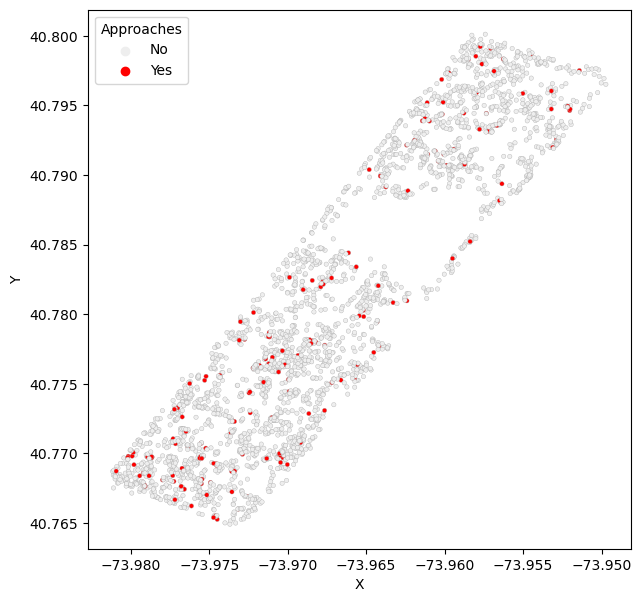

In [58]:
plt.subplots(figsize=(7, 7))
sns.scatterplot(
    data=data,
    x='X',
    y='Y',
    hue=data['Approaches'].map({True:'Yes', False:'No'}),
    edgecolor='#aaaaaa',
    alpha=1,
    s=10,
    palette=['#eeeeee', 'red'],
);

In [47]:
data.sort_values(by='Approaches')['Approaches']

0       False
1977    False
1978    False
1979    False
1980    False
        ...  
1661     True
1289     True
2815     True
1270     True
3022     True
Name: Approaches, Length: 3023, dtype: bool

# Squirrel poems

## Sampling various cols for aesthetic viability

In [5]:
# Sampling `Other Activities` for poem viability
data['Other Activities'].dropna().sample(10)

1239                                              sitting
90                                                walking
239                                    sitting very still
1662                                             chillin'
800                               communicating from tree
1527                                chasing (#7),playing?
1133                                          watching me
2691    hopping & flipping around. this one was very e...
1092          running across ball field 5,near home plate
1452                                     hiding from bird
Name: Other Activities, dtype: object

In [6]:
# Sampling `Color notes` for poem viability
data['Color notes'].dropna().sample(10)

1187                                       Cinnamon belly
2049                                           Short tail
2393                                              beauty!
2851    Gray, Black, & Cinnamon selected as Primary. G...
1533    Gray & Cinnamon selected as both Primary and H...
562                            Cinnamon along back & tail
2871                           Cinnamon along tail & back
2571                                                  !!!
2945                                      white back legs
741                              White legs, front & back
Name: Color notes, dtype: object

In [7]:
# Sampling `Specific Location` for poem viability
data['Specific Location'].dropna().sample(10)

1779                                                 Rock
2257                                  edge of park @ 98th
1220                                              up tree
95                    tree near large rock on Bridle Path
2609                                      middle of grass
1140    hopped over fence and chased # 6 around tree &...
615                                     THICK UNDERGROWTH
1304    Large tree by (fence of the conservatory) abou...
2782                 in tall shrubs near wall next to CPW
567                                in grass by light post
Name: Specific Location, dtype: object

## Compute poetry

In [8]:
# Features to pass to poem generating function
other_activities_list = data['Other Activities'].dropna().values
specific_location_list = data['Specific Location'].dropna().values
color_notes_list = data['Color notes'].dropna().values

# Poem generating function
def generate_poem(*args):

    poem = []
    for arg in args:
        poem.append(np.random.choice(arg))
        
    random.shuffle(poem)
    return '\n'.join(poem)

In [9]:
# Generate 10 poems
for _ in range(10):
    print(generate_poem(other_activities_list, specific_location_list, color_notes_list))
    print()

chasing #4
Cinnamon tail & belly
small open area but w/ 7 large oak trees

walking
"FIELD"
Cinnamon oval on back

together w/ #3
Black & Cinnamon selected as Primary. White selected as Highlights. Made executive adjustments.
edge of park at 108th West

very quietly searching in long grass
rocky outcrop
white tail

Gray & Cinnamon selected as Primary. Gray & White selected as Highlights. Made executive adjustments.
checkin' his stashes
In small tree by water

tree near large rock on Bridle Path
digging deeeep
gray tail

top of tree
Cinnamon belly
standing

digging
Tiny! So tiny!
in tree

digging
in tree
Cinnamon patches

digging
in tree by arsenal - climbing
Cinnamon head



In [10]:
# Under construction function for a poetry generating function that can take an arbitrary
# number of text columns from which to pull poetry contents and an arbitrary number of boolean masks
# to filter DataFrame beforehand

'''
def generate_poem(filter_col='Approaches', col_name='Specific Location'):
    
    data.loc[data[filter_col] == True, col_name].dropna().values # List

    poem = []
    for arg in args:
        poem.append(np.random.choice(arg))
        
    random.shuffle(poem)
    return '\n'.join(poem)

for _ in range(10):
    print(generate_poem(other_activities_list, specific_location_list, color_notes_list))
    print()
'''

"\ndef generate_poem(filter_col='Approaches', col_name='Specific Location'):\n    \n    data.loc[data[filter_col] == True, col_name].dropna().values # List\n\n    poem = []\n    for arg in args:\n        poem.append(np.random.choice(arg))\n        \n    random.shuffle(poem)\n    return '\n'.join(poem)\n\nfor _ in range(10):\n    print(generate_poem(other_activities_list, specific_location_list, color_notes_list))\n    print()\n"

# Squirrel sounds over time

In [11]:
data['Date'] = pd.to_datetime(data['Date'], format='%m%d%Y')

In [12]:
# Get date range of data collection
data['Date'].agg(['min', 'max'])

min   2018-10-06
max   2018-10-20
Name: Date, dtype: datetime64[ns]

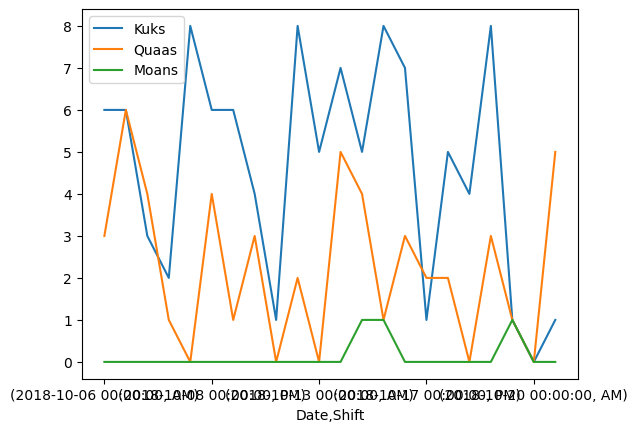

In [13]:
# Chart sounds over time (need to clean up x-ticks)
data.groupby(['Date', 'Shift'])[['Kuks', 'Quaas', 'Moans']].sum().plot(kind='line');

# Wordclouds
Will need [WordCloud](https://amueller.github.io/word_cloud/) library

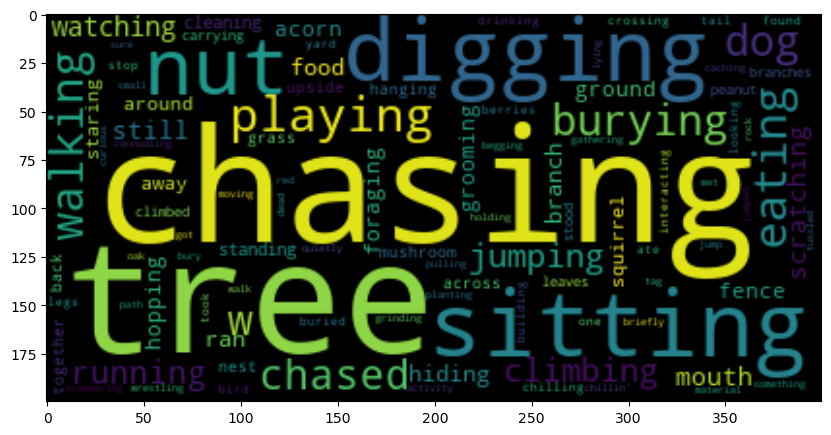

In [14]:
from wordcloud import WordCloud

other_activities_str = ' '.join(data['Other Activities'].dropna())

plt.subplots(figsize=(10, 8))

wc = WordCloud(
    max_words=100, collocations=False,
).generate(other_activities_str)

plt.imshow(wc, interpolation='bilinear');

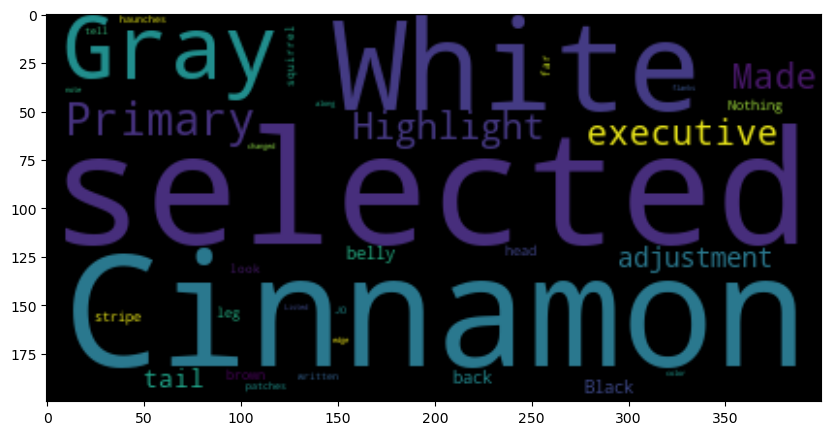

In [15]:
colors_str = ' '.join(data['Color notes'].dropna().astype('str'))

plt.subplots(figsize=(10, 8))

wc = WordCloud(
    max_words=100, collocations=False,
).generate(colors_str)

plt.imshow(wc, interpolation='bilinear');

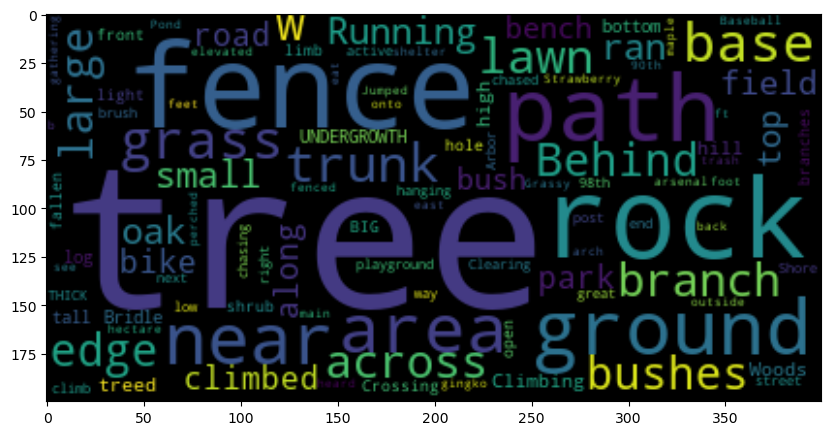

In [16]:
locations_str = ' '.join(data['Specific Location'].dropna().astype('str'))

plt.subplots(figsize=(10, 8))

wc = WordCloud(
    max_words=100, collocations=False,
).generate(locations_str)

plt.imshow(wc, interpolation='bilinear');

## Other Activites: Running From vs. Approaches

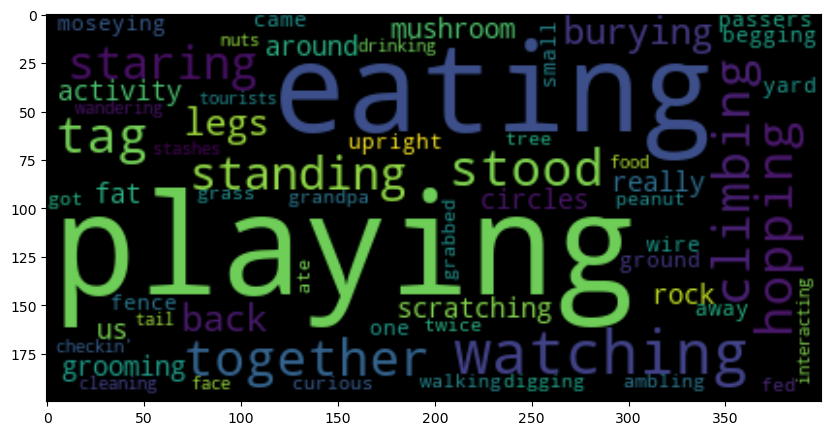

In [17]:
approaches = data['Approaches'] == True
runs_from = data['Runs from'] == True

activities_approaches = ' '.join(data.loc[approaches, 'Other Activities'].dropna().astype('str'))
activities_runs_from = ' '.join(data.loc[runs_from, 'Other Activities'].dropna().astype('str'))

# Approaches
plt.subplots(figsize=(10, 8))

wc1 = WordCloud(
    max_words=100, collocations=False,
).generate(activities_approaches)

plt.imshow(wc1, interpolation='bilinear');

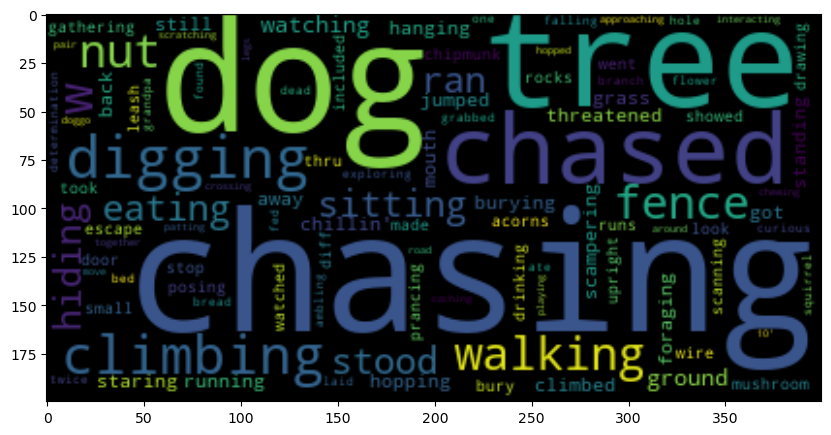

In [18]:
# Running From
plt.subplots(figsize=(10, 8))

wc = WordCloud(
    max_words=100, collocations=False,
).generate(activities_runs_from)

plt.imshow(wc, interpolation='bilinear');